# Music listening history analysis

Import required packages

In [44]:
import lfmxtractplus.export_data as lf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import calmap as cm
from IPython.display import display, HTML

%matplotlib inline


initialize lfmxtractplus with config.yaml

In [45]:
lf.initialize('C:\\Users\Madhan\PycharmProjects\lfm4pandas\config.yaml')

https://accounts.spotify.com/authorize?client_id=c6df0ec4beda4f589b5984801224bfd6&response_type=code&redirect_uri=https%3A%2F%2Fexample.com%2Fcallback%2F
Paste the above link into your browser, then paste the redirect url here: https://example.com/callback/?code=AQDsjfl_8_BffkGjFSzik60xZxVJsbmmOm8dM5n83K1w32-YfOkaBiQCT990oxb5o9liyJlB0JnAda8gCbJtzQH-grCADWy-zdFIGtkr-zOza3HD5uGyHOdu_A4hisfNsTUvQvxLY5mbnmGmvti94IO4T90fa_NNm2OgXu9164fIug_50JZsLxBIUJ18MXZqbGnrVUk


Get listening history from last.fm and enrich with spotify audio features

In [46]:
scrobbles_dict = lf.generate_dataset(lfusername='madhan_001', pages=10)
scrobbles_df = scrobbles_dict['complete']


Fetching data from last.fm for user madhan_001

15930 total tracks scrobbled by the user

10 total pages to retrieve


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:33<00:00,  3.35s/it]




Fetching SpotifyID for tracks


100%|████████████████████████████████████████████████████████████████████████████████| 441/441 [01:57<00:00,  3.61it/s]



tracks without spotifyID : 4

Fetching audio features for tracks


100%|████████████████████████████████████████████████████████████████████████████████| 441/441 [00:53<00:00,  8.36it/s]


tracks without audio features : 4


Display extracted data

In [47]:
print("Plays by timestamp")
display(HTML(scrobbles_df.head(5).to_html()))

Plays by timestamp


,timestamp,datetime,artist_name,artist_mbid,album_name,album_mbid,track_name,track_mbid,frequency,trackID,lengthMS,popularity,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo
0,1562584002,2019-07-08 16:36:42+05:30,MISSIO,ae5af627-ccd6-4db5-974d-83da8e32e705,Rad Drugz,,Rad Drugz,3c897bb5-8f82-4be9-a6e8-d91afa336f7f,16,0u2A867SnSHy7JOmQtNA3x,229648.0,48.0,indie poptimism,0.612,0.886,7.0,-5.078,1.0,0.0325,0.019700,0.0824,0.000003,0.579,109.025
1,1562583773,2019-07-08 16:32:53+05:30,MISSIO,ae5af627-ccd6-4db5-974d-83da8e32e705,The Darker the Weather // The Better the Man,,I See You,a3f4279f-ef61-421d-8a88-6596241fab1b,5,3EqHFfCSbX4Z1pX8JQ0c0r,228735.0,63.0,indie poptimism,0.461,0.766,1.0,-6.875,1.0,0.0566,0.000484,0.0884,0.000057,0.399,169.957
2,1562583545,2019-07-08 16:29:05+05:30,MISSIO,ae5af627-ccd6-4db5-974d-83da8e32e705,Rad Drugz,,Rad Drugz,3c897bb5-8f82-4be9-a6e8-d91afa336f7f,16,0u2A867SnSHy7JOmQtNA3x,229648.0,48.0,indie poptimism,0.612,0.886,7.0,-5.078,1.0,0.0325,0.019700,0.0824,0.000003,0.579,109.025
3,1562583284,2019-07-08 16:24:44+05:30,All Time Low,62162215-b023-4f0e-84bd-1e9412d5b32c,Future Hearts,0573c7a9-c6bc-48dd-9939-673a64c8dd96,Something's Gotta Give,0f3538e0-2d8c-4d8b-9541-c6ccfa586db9,29,6OPoF9qiuV2dNfJ44w3X4M,189418.0,57.0,neon pop punk,0.496,0.913,4.0,-3.286,1.0,0.0448,0.010100,0.1180,0.000000,0.675,165.981
4,1562583101,2019-07-08 16:21:41+05:30,MØ,3ab2ee23-1c2f-458c-9c8c-ca4844729120,Blur (feat. Foster The People),,Blur (Feat. Foster The People),,22,653SgdD6rQ9YPtsqRgQVzm,181961.0,63.0,dance pop,0.616,0.809,1.0,-4.775,0.0,0.0330,0.014800,0.7180,0.000000,0.468,140.007


In [48]:
library_df = scrobbles_dict['library']
display(HTML(library_df.head(5).to_html()))


,artist_name,track_name,frequency,trackID,lengthMS,popularity,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo
0,5 Seconds of Summer,Youngblood,1,2iUXsYOEPhVqEBwsqP70rE,203417.0,84.0,boy band,0.596,0.854,7.0,-5.114,0.0,0.4630,0.016900,0.124,0.000000,0.152,120.274
1,AFI,Miss Murder,3,0Ti2dlF2xLjXblvdU5fCxM,206586.0,69.0,alternative metal,0.309,0.875,1.0,-4.490,1.0,0.0488,0.000213,0.113,0.001680,0.725,143.526
2,ASIAN KUNG-FU GENERATION,Re: Re:,1,7gehOKSGfZgjIJSxiyE8oD,332240.0,52.0,anime,0.464,0.869,6.0,-5.050,0.0,0.0502,0.000254,0.248,0.000403,0.506,155.009
3,Aaron Smith,Dancin (feat. Luvli) - Krono Remix,5,6WkJ2OK163XXS2oARUC9JM,198053.0,84.0,chicago house,0.720,0.741,10.0,-6.529,0.0,0.0287,0.101000,0.289,0.000014,0.357,119.896
4,Airways,Trampoline,1,7L3JHmRhM4kJLeYdKerxBD,183013.0,39.0,modern alternative rock,0.697,0.692,11.0,-6.011,0.0,0.1470,0.086200,0.317,0.004620,0.844,89.841


Unmapped tracks

In [49]:
unmapped_track_df = lf.unmapped_tracks(library_df)
display(HTML(unmapped_track_df.to_html()))
#unmapped_track_df.to_csv("unmappable.tsv", sep='\t')

,artist_name,track_name,frequency,trackID,lengthMS,popularity,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo
192,Ke$ha,Animal,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Ke$ha,TiK ToK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,Motörhead,Ace Of Spades - Live From United Kingdom / 1981,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,Silent Siren,恋い雪,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping rows with unmapped tracks from scrobbles_df

In [50]:
scrobbles_df = scrobbles_df[pd.notnull(scrobbles_df['trackID'])]
display(HTML(lf.unmapped_tracks(scrobbles_df).head(5).to_html()))

,timestamp,datetime,artist_name,artist_mbid,album_name,album_mbid,track_name,track_mbid,frequency,trackID,lengthMS,popularity,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo


Dropping rows with unmapped tracks from library_df

In [51]:
library_df = library_df[pd.notnull(library_df['trackID'])]
display(HTML(lf.unmapped_tracks(library_df).head(5).to_html()))

,artist_name,track_name,frequency,trackID,lengthMS,popularity,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo


creating artist_df to get number of plays from each artist

In [52]:
artist_df = scrobbles_df.groupby(['artist_name']).size().reset_index()
artist_df.rename(columns={0: 'frequency'}, inplace=True)
artist_df.set_index(['artist_name'], inplace=True)
artist_df.sort_values("frequency",inplace=True, ascending=False)
display(HTML(artist_df.head(5).to_html()))

,frequency
artist_name,
Grimes,188
Mötley Crüe,124
Megadeth,122
Billie Eilish,83
Phoebe Ryan,58


plotting barplot for top 20 artists

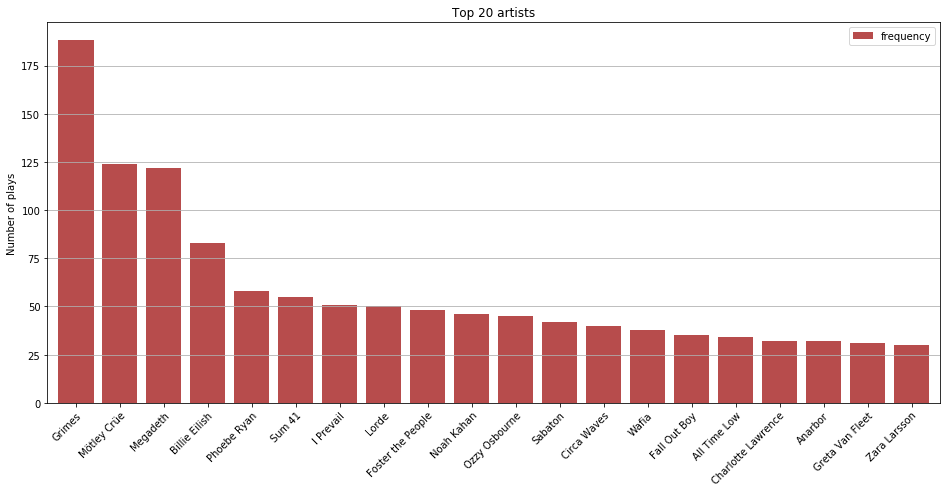

In [53]:
ax = artist_df.head(20).plot(kind='bar', figsize=[16, 7], width=0.8, alpha=0.7, color='#990000')
ax.yaxis.grid(True)
ax.set_xticklabels(artist_df.index,rotation=45, rotation_mode='anchor', ha='right')
ax.set_title('Top 20 artists')
ax.set_xlabel('',)
ax.set_ylabel('Number of plays')

plt.show()

creating artist_df to get number of plays from each artist

In [54]:
track_df = scrobbles_df.groupby(['track_name']).size().reset_index()
track_df.rename(columns={0: 'frequency'}, inplace=True)
track_df.set_index(['track_name'], inplace=True)
track_df.sort_values("frequency",inplace=True, ascending=False)
display(HTML(track_df.head(5).to_html()))

,frequency
track_name,
Killing Is My Business...And Business Is Good! - Remastered 2018,60
The Dirt (Est. 1981) [feat. Machine Gun Kelly],51
A Thousand Ways,48
SHC,47
False Confidence,45


plotting barplot for top 20 tracks

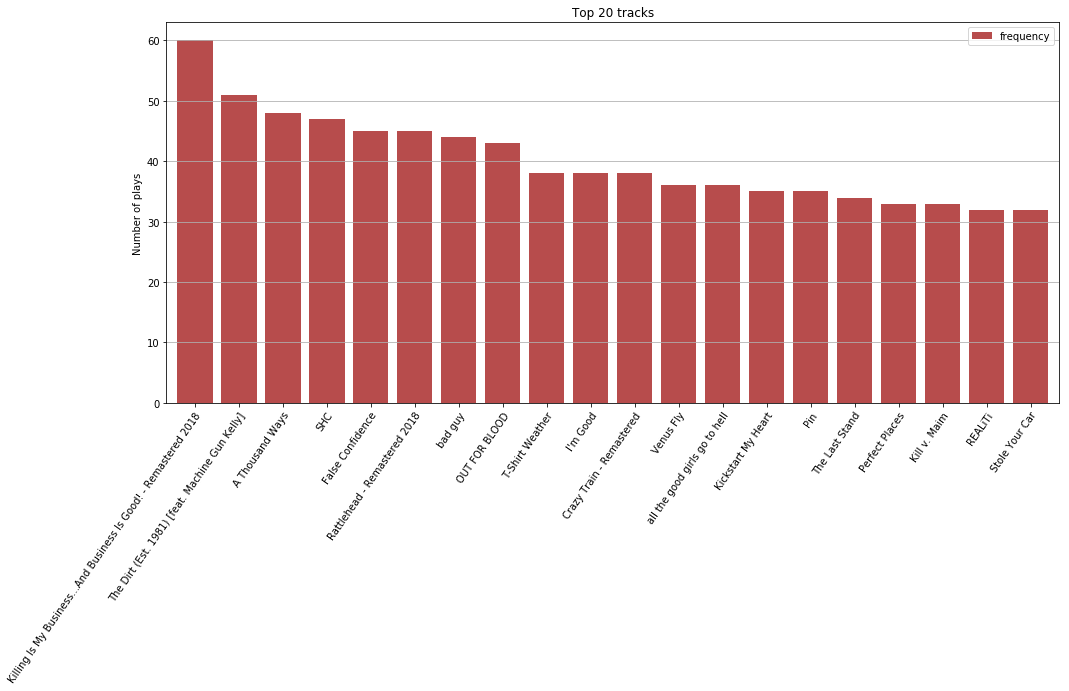

In [55]:
ax = track_df.head(20).plot(kind='bar', figsize=[16, 7], width=0.8, alpha=0.7, color='#990000')
ax.yaxis.grid(True)
ax.set_xticklabels(track_df.index,rotation=55, rotation_mode='anchor', ha='right')
ax.set_title('Top 20 tracks')
ax.set_xlabel('',)
ax.set_ylabel('Number of plays')

plt.show()

creating album_df to get number of plays from each artist

In [56]:
album_df = scrobbles_df.groupby(['album_name']).size().reset_index()
album_df.rename(columns={0: 'frequency'}, inplace=True)
album_df.set_index(['album_name'], inplace=True)
album_df.sort_values("frequency",inplace=True, ascending=False)
display(HTML(album_df.head(5).to_html()))

,frequency
album_name,
Art Angels,157
Warheads on Foreheads,109
"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",81
The Dirt Soundtrack,58
Melodrama,50


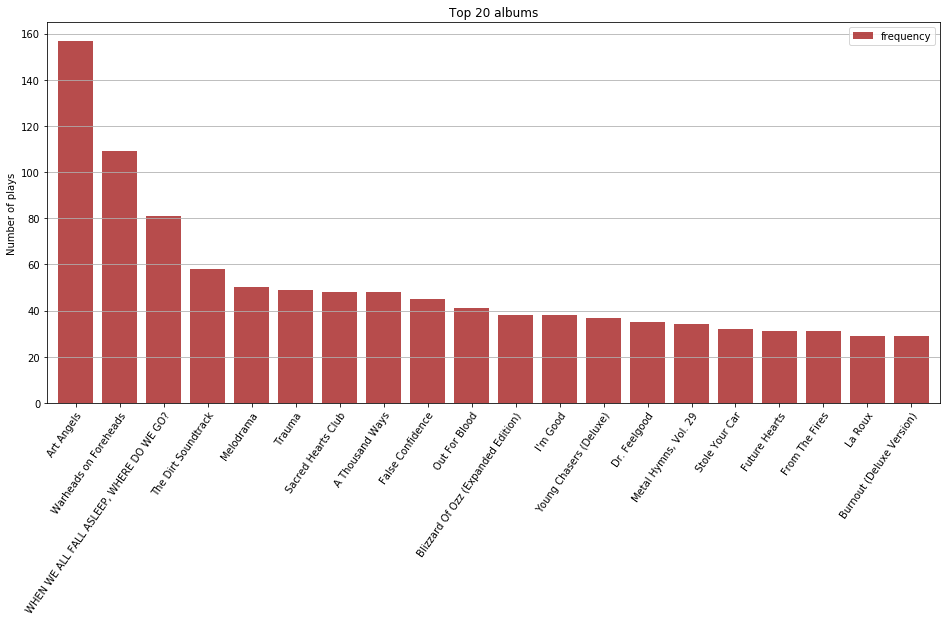

In [57]:
ax = album_df.head(20).plot(kind='bar', figsize=[16, 7], width=0.8, alpha=0.7, color='#990000')
ax.yaxis.grid(True)
ax.set_xticklabels(album_df.index,rotation=55, rotation_mode='anchor', ha='right')
ax.set_title('Top 20 albums')
ax.set_xlabel('',)
ax.set_ylabel('Number of plays')

plt.show()

creating genre_df to get number of plays from each artist

In [58]:
genre_df = scrobbles_df.groupby(['genre_name']).size().reset_index()
genre_df.rename(columns={0: 'frequency'}, inplace=True)
genre_df.set_index(['genre_name'], inplace=True)
genre_df.sort_values("frequency",inplace=True, ascending=False)
display(HTML(genre_df.head(5).to_html()))

,frequency
genre_name,
art pop,242
album rock,197
dance pop,182
glam metal,124
electropop,105


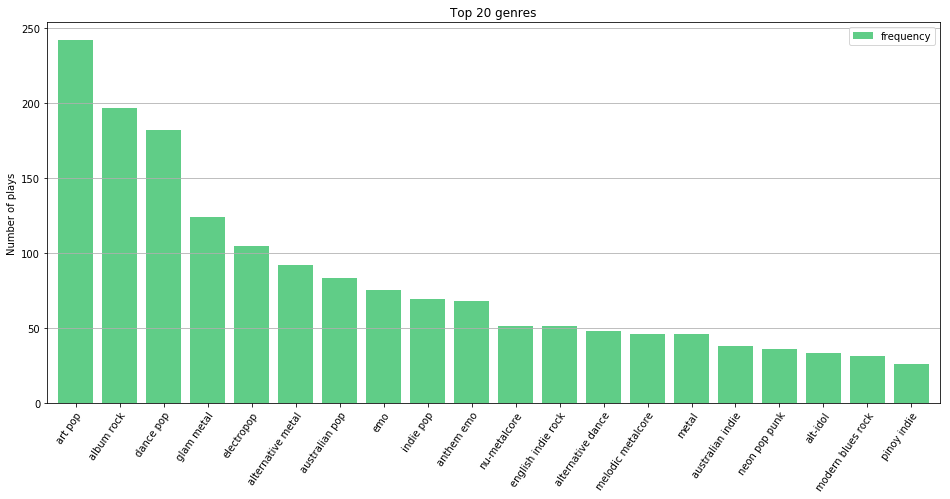

In [59]:
ax = genre_df.head(20).plot(kind='bar', figsize=[16, 7], width=0.8, alpha=0.7, color='#1db954')
ax.yaxis.grid(True)
ax.set_xticklabels(genre_df.index,rotation=55, rotation_mode='anchor', ha='right')
ax.set_title('Top 20 genres')
ax.set_xlabel('',)
ax.set_ylabel('Number of plays')

plt.show()

#### Listening habits

Tracks listened by the hour of day

In [60]:
hour = pd.DataFrame()

hour['hour'] = sorted(scrobbles_df['datetime'].dt.hour.unique())
hour['h_freq'] = scrobbles_df['datetime'].dt.hour.value_counts(sort=True)
hour = hour.set_index('hour')['h_freq']
print(hour.head(25))

hour
0     156.0
1     121.0
2      70.0
3      52.0
4      10.0
6       NaN
7       2.0
8     155.0
9      36.0
10     11.0
11     18.0
12     58.0
13     95.0
14    170.0
15    119.0
16    102.0
17    188.0
18     61.0
19     67.0
20     85.0
21    113.0
22     97.0
23     91.0
Name: h_freq, dtype: float64


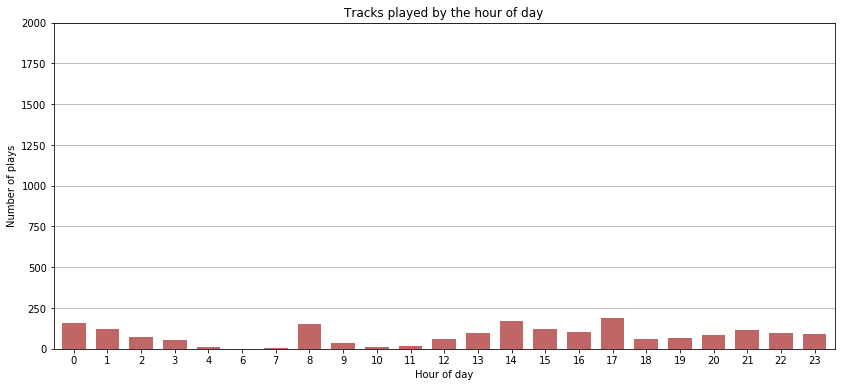

In [61]:
ax = hour.plot(kind='bar', figsize=[14, 6], width=0.7, alpha=0.6, color='#990000', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(hour.index, rotation=0)

ax.set_ylim((0, 2000))
ax.set_title('Tracks played by the hour of day')
ax.set_xlabel('Hour of day')
ax.set_ylabel('Number of plays')

plt.show()

Tracks listened by the day of the week

In [62]:
week_df = pd.DataFrame()
dayOfWeek={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

week_df['int_day'] = scrobbles_df['datetime'].dt.dayofweek
week_df = week_df.groupby(['int_day']).size().reset_index()
week_df.rename(columns={0: 'frequency'}, inplace=True)
week_df['day_name'] = week_df['int_day'].map(dayOfWeek)
week_df.set_index(['day_name'], inplace=True)
week_df.sort_values("int_day",inplace=True, ascending=True)
week_df.drop(['int_day'],axis=1,inplace=True)
display(HTML(week_df.head(5).to_html()))

,frequency
day_name,
Mon,351
Tue,278
Wed,356
Thu,294
Fri,287


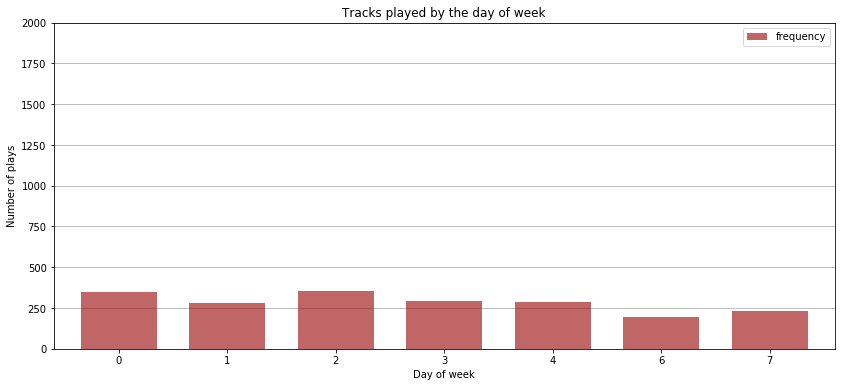

In [63]:
ax = week_df.plot(kind='bar', figsize=[14, 6], width=0.7, alpha=0.6, color='#990000', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(hour.index, rotation=0)

ax.set_ylim((0, 2000))
ax.set_title('Tracks played by the day of week')
ax.set_xlabel('Day of week')
ax.set_ylabel('Number of plays')

plt.show()

heatmap for daily activity

In [64]:
date = pd.DataFrame()
date['date'] = pd.to_datetime(scrobbles_df['timestamp'].astype(int), unit='s').dt.date
date['date'] = pd.to_datetime(date['date'])
dateF = date.groupby('date').date.count()
dateF=pd.Series(dateF)
print(dateF.head(5))

date
2019-03-26    33
2019-03-27    37
2019-03-28    44
2019-03-29    10
2019-03-30    12
Name: date, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\calmap\__init__.py:294: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  by_day = data.resample('D', how=how)
C:\ProgramData\Anaconda3\lib\site-packages\calmap\__init__.py:146: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  linecolor = ax.get_axis_bgcolor()


(<matplotlib.figure.Figure at 0x1c181ba2240>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1842D84A8>],
       dtype=object))

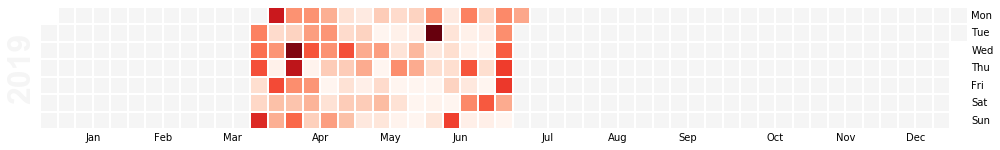

In [65]:
plt.rcParams["figure.figsize"]=14,6
cm.calendarplot(dateF)

### Total listening time

In [66]:
print("Mean tracks listened per day "+str(round(dateF.mean())))
listeningTime_totalms = scrobbles_df['lengthMS'].sum()
listeningTime_totals = str(round((listeningTime_totalms / 1000) % 60))
listeningTime_totalmin = str(round(((listeningTime_totalms / (1000*60)) % 60)))
listeningTime_totalhrs   = str(round((listeningTime_totalms / (1000*60*60)) % 24))
listeningTime_totaldays = str(round((listeningTime_totalms / (1000*60*60*24))))

print(listeningTime_totaldays+" days")
print(listeningTime_totalhrs+" hrs")
print(listeningTime_totalmin+" mins")

Mean tracks listened per day 21
5.0 days
2.0 hrs
49.0 mins


#### Extracting data for billboard hot 100 playlist for use as a baseline of comparison

In [67]:
billboard_df = lf.get_playlist(user='billboard.com', playlist_id='6UeSakyzhiEt4NB3UAd6NQ')
display(HTML(billboard_df.head(5).to_html()))



Fetching playlist


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.14it/s]



Fetching audio features for tracks


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.33it/s]


tracks without audio features : 0


,track,trackID,artist,artistID,genre,lengthMS,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo
0,Old Town Road - Remix,6u7jPi22kF8CTQ3rb9DHE7,Lil Nas X,7jVv8c5Fj3E9VhNjxT4snq,country rap,157066,98,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.1130,0.00,0.639,136.041
1,Señorita,0TK2YIli7K1leLovkQiNik,Shawn Mendes,7n2wHs1TKAczGzO7Dd2rGr,canadian pop,190960,99,0.759,0.540,9,-6.039,0,0.0287,0.0370,0.0945,0.00,0.750,116.947
2,bad guy,2Fxmhks0bxGSBdJ92vM42m,Billie Eilish,6qqNVTkY8uBg9cP3Jd7DAH,electropop,194087,99,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.1000,0.13,0.562,135.128
3,Talk,0rTV5WefWd1J3OwIheTzxM,Khalid,6LuN9FCkKOj5PcnpouEgny,pop,197487,86,0.900,0.400,0,-8.443,1,0.1240,0.0501,0.0876,0.00,0.338,136.001
4,I Don't Care (with Justin Bieber),3HVWdVOQ0ZA45FuZGSfvns,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,pop,219946,100,0.798,0.675,6,-5.041,1,0.0442,0.0912,0.0894,0.00,0.842,101.956


In [68]:
billboard_df.describe()

,lengthMS,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,197206.150000,83.090000,0.711620,0.632720,4.740000,-5.713200,0.650000,0.123224,0.197282,0.162540,5.533449e-03,0.507657,119.456010
std,33145.224855,11.194421,0.124063,0.142052,3.398217,1.840953,0.479372,0.115987,0.194106,0.115437,4.116045e-02,0.216446,29.572375
min,114893.000000,24.000000,0.423000,0.321000,0.000000,-11.713000,0.000000,0.028000,0.001240,0.057400,0.000000e+00,0.089700,70.142000
25%,176736.250000,78.000000,0.627000,0.523750,1.000000,-6.781250,0.000000,0.044575,0.048250,0.092550,0.000000e+00,0.344750,95.927250
50%,192789.500000,84.500000,0.725500,0.632500,5.000000,-5.575000,1.000000,0.069000,0.125500,0.123500,0.000000e+00,0.489000,115.362500
75%,215070.750000,90.000000,0.795250,0.731000,8.000000,-4.639250,1.000000,0.155250,0.324250,0.191000,2.675000e-07,0.656250,140.036750
max,312820.000000,100.000000,0.948000,0.904000,11.000000,-2.232000,1.000000,0.588000,0.816000,0.795000,3.910000e-01,0.952000,202.006000


genres in Billboard Hot 100

In [69]:
BBgenre_df = pd.DataFrame()
BBgenre_df['genre'] = billboard_df['genre']
BBgenre_df = billboard_df.groupby(['genre']).size().reset_index()
BBgenre_df.rename(columns={0: 'frequency'}, inplace=True)
BBgenre_df.set_index(['genre'], inplace=True)
BBgenre_df.sort_values("frequency",inplace=True, ascending=False)
display(HTML(BBgenre_df.head(5).to_html()))

,frequency
genre,
contemporary country,18
dance pop,15
pop,11
hip hop,6
boy band,4


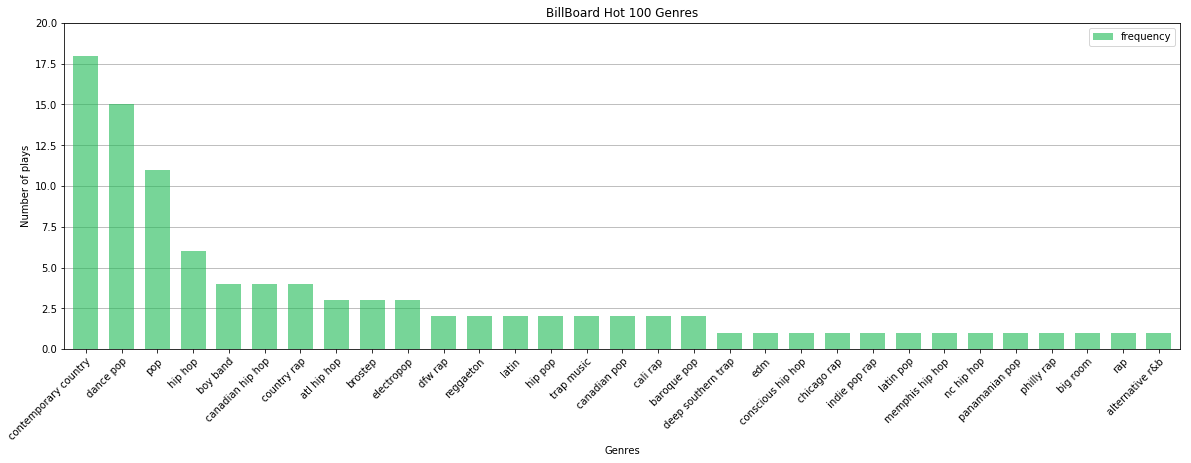

In [70]:
ax = BBgenre_df.plot(kind='bar', figsize=[20, 6], width=0.7, alpha=0.6, color='#1db954', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(BBgenre_df.index, rotation=45, rotation_mode='anchor', ha='right')
ax.set_ylim((0, 20))
ax.set_title('BillBoard Hot 100 Genres')
ax.set_xlabel('Genres')
ax.set_ylabel('Number of plays')

plt.show()

# The top 1%

In [71]:
def top (ser):
    total=len(ser)
    #print(total)
    tp = int(round ((0.01*total)))
    #print(tp)
    res = ser.head(tp).sum()
    return res
def topPC(ser):
    total=len(ser)
    #print(total)
    tp = int(round ((0.01*total)))
    #print(tp)
    res = ser.head(tp).sum()
    pc=((res/len(scrobblesDF.index))*100)
    return pc
def onePC(df):
    total=len(df.index)
    tp = int(round((0.01*total)))
    #print(tp)
    return tp
def AEP(ser):
    #print(ser.head(50))
    slope = (ser[0]-ser[49])/50
    #print(slope)
    avg = ser.head(50).mean()
    #print(avg)
    score = 5-(slope/avg)*25
    return round(score,2)

## AEP and Diversity

### AEP
> The AEP [Anti Exponential Points] is a number that is between -20 and 5 that shows how much preference a last.fm user has for his or her top artists or tracks. 5 is the max value for the AEP and it takes this value when the user has listened all the 50 top artists an equal number of times.

### Diversity
> Similar to AEP but for genres.

#### AEP Formula

 > AEP = 5 - 25 * ( Slope / AverageTop50 )

 > Slope = (value of the first artist in the chart - value of the 50th artist in the chart) / 50

 > AverageTop50 = ( The sum of all values in the top 50 ) / 50

In [72]:
print("Diversity for genres "+str(AEP(genre_df['frequency'])))
print("AEP for artists "+str(AEP(artist_df['frequency'])))
print("AEP for tracks "+str(AEP(track_df['frequency'])))

Diversity for genres 1.87
AEP for artists 2.27
AEP for tracks 4.04
